In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# Dependencies
import tweepy
import json
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
os.chdir(os.path.join('..','..','..','..','..','..'))
curr_working_directory = os.getcwd()
os.getcwd()
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
#api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [22]:
target_terms = ('@BBC','@Fox','@CNN','@CBS','@nytimes')

tweets = []
target_list = []
user_list = []
compound_list = []
tweet_id = []
created_at = []
favorite_count = []
tweet_text_list = []
pos_list = []
neg_list = []
neu_list = []
api = tweepy.API(auth)

In [23]:
for target in target_terms:
    
    for tweet in tweepy.Cursor(api.user_timeline, target, tweet_mode='extended').items(100):
        tweets.append(tweet)
    

In [24]:
len(tweets)

500

In [25]:
for t in tweets:
    tweet_user = t.user.screen_name
    tweet_text = t.full_text
    results = analyzer.polarity_scores(tweet_text)
    compound = results["compound"]
    pos = results["pos"]
    neu = results["neu"]
    neg = results["neg"]
    
    tweet_id.append(t.id)
    created_at.append(t.created_at)
    #favorite_count.append(t.favorite_count)
    tweet_text_list.append(tweet_text)
    compound_list.append(compound)
    user_list.append(tweet_user)
    pos_list.append(pos)
    neg_list.append(neg)
    neu_list.append(neu)

In [26]:
tweets_df = pd.DataFrame({
    'User': user_list,
    'Tweet ID': tweet_id,
    'Tweet Time': created_at,
    'Tweet Text': tweet_text_list,
    'Compound': compound_list,
    'Positive': pos_list,
    'Negative': neg_list,
    'Neutral': neu_list
    })
tweets_df

,User,Tweet ID,Tweet Time,Tweet Text,Compound,Positive,Negative,Neutral
0,BBC,1263181007357968384,2020-05-20 18:53:15,For details of organisations which offer advic...,0.4019,0.153,0.000,0.847
1,BBC,1263167856956411904,2020-05-20 18:01:00,.@DavidHarewood revisits a psychotic episode w...,0.0000,0.000,0.000,1.000
2,BBC,1263137658232070145,2020-05-20 16:01:00,"As our lives get more complicated, simple thin...",0.6115,0.210,0.000,0.790
3,BBC,1263107674511757316,2020-05-20 14:01:51,More information about the range of programmin...,0.0000,0.000,0.000,1.000
4,BBC,1263107459138433030,2020-05-20 14:01:00,Whether you’ve been together for 8 weeks or 8 ...,0.6808,0.174,0.056,0.769
...,...,...,...,...,...,...,...,...
495,nytimes,1263034790355271681,2020-05-20 09:12:14,"Tom Moore, the 100-year-old former British arm...",0.0000,0.000,0.000,1.000
496,nytimes,1263031741884882946,2020-05-20 09:00:07,After years of increasing tensions that nearly...,-0.7964,0.058,0.213,0.729
497,nytimes,1263026693721264128,2020-05-20 08:40:04,"In her novels and short stories, Yu Lihua gave...",-0.7096,0.000,0.131,0.869
498,nytimes,1263021681955790848,2020-05-20 08:20:09,"In Opinion\n\nRichard Flanagan writes, ""Scient...",0.8687,0.250,0.039,0.711


Text(0.5, 1.0, 'Sentiment Analysis by Media Corporation')

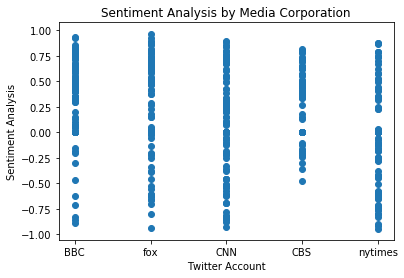

In [28]:
fig = plt.scatter(tweets_df['User'],tweets_df['Compound'])
plt.xlabel("Twitter Account")
plt.ylabel("Sentiment Analysis")
plt.title("Sentiment Analysis by Media Corporation")



In [33]:
plt.savefig('twitter.png')
plt.show()

PermissionError: [Errno 13] Permission denied: 'twitter.png'

<Figure size 432x288 with 0 Axes>

In [ ]:
-CBS trends toward a more positive sentiment
-